<a href="https://colab.research.google.com/github/devpatel0005/Prediction-of-House-Prices-using-Multiple-Regression/blob/main/Prediction_of_House_Prices_using_Multiple_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Problem Statement
The problem on hand is to predict the housing prices of a town or a suburb based on the features of the locality provided to us. In the process, we need to identify the most important features in the dataset. We need to employ techniques of data preprocessing and build a linear regression model that predicts the prices for us.

# Data Information
Each record in the database describes a Boston suburb or town. The data was drawn from the Boston Standard Metropolitan Statistical Area (SMSA) in 1970. Detailed attribute information can be found below-

Attribute Information (in order):

CRIM: per capita crime rate by town

ZN: proportion of residential land zoned for lots over 25,000 sq.ft.

INDUS: proportion of non-retail business acres per town

CHAS: Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)

NOX: nitric oxides concentration (parts per 10 million)

RM: average number of rooms per dwelling

AGE: proportion of owner-occupied units built prior to 1940

DIS: weighted distances to five Boston employment centres

RAD: index of accessibility to radial highways

TAX: full-value property-tax rate per 10,000 dollars

PTRATIO: pupil-teacher ratio by town

B1000: (Bk - 0.63)^2 where Bk is the proportion of blacks by town

LSTAT: %lower status of the population

MEDV: Median value of owner-occupied homes in 1000 dollars.

In [219]:
# Since we cannot import boston dataset directly from sklearn.datasets we are using this fetch_openml for loading that dataseet
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
df=pd.read_csv('https://raw.githubusercontent.com/selva86/datasets/refs/heads/master/BostonHousing.csv')
df.head()
#here medv is the target variable and rest all are independent variables since we are predicting the house prices and rest all represents the features of the house

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


The price of the house indicated by the variable MEDV is the target variable and the rest are the independent variables based on which we will predict house price.

In [220]:
df.columns=['CRIM','ZN','INDUS','CHAS','NOX','RM','AGE','DIS','RAD','TAX','PTRATIO','B','LSTAT','MEDV']

In [221]:
df.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


Observations:____

Crime rates average is 3.6 with very low crime rates in 50% of towns and extreme high rates in other towns.

At least 50% of Boston towns have no zoned lands for large lot.

The mean of CHAS is 0.07, which means that most of the houses are not on riverside.

The mean of Age is 68 which means the houses are older.

The mean of 20 medv suggests that the house prices will be around $20,000

#Checking Missing values

In [222]:
df.info()
pd.isnull(df).sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    int64  
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    int64  
 9   TAX      506 non-null    int64  
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(11), int64(3)
memory usage: 55.5 KB


,0
CRIM,0
ZN,0
INDUS,0
CHAS,0
NOX,0
RM,0
AGE,0
DIS,0
RAD,0
TAX,0


#observations
1. There are a total of 506 non-null observations in each of the columns. This indicates that there are no missing values in the data.If there were any null data then we have to manage them by either replacing it by mean or droping it or replacing it with mode in case of categorical values.

  command for replacing the null values: df.fillna(df.median(), inplace=True)

2. Every column in this dataset is numeric in nature.So Linear Regression is suitabable here.




#univariate analysis

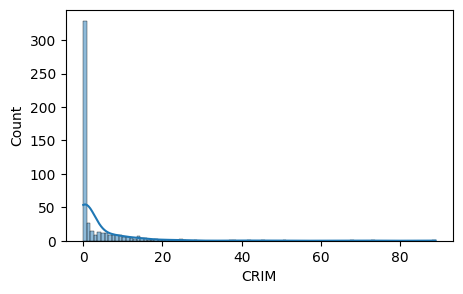

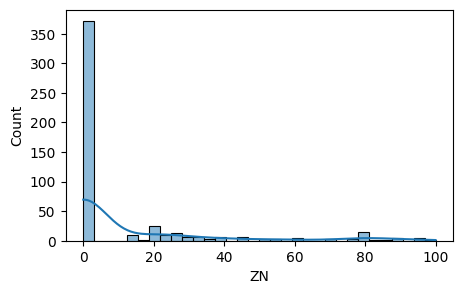

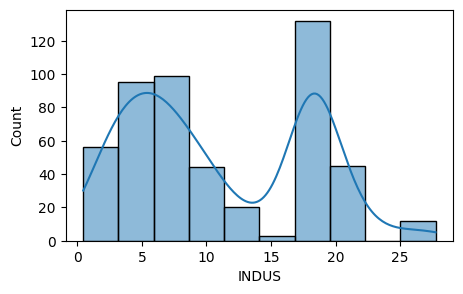

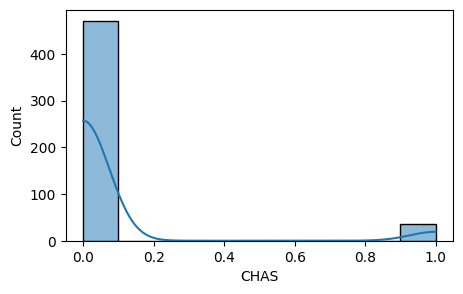

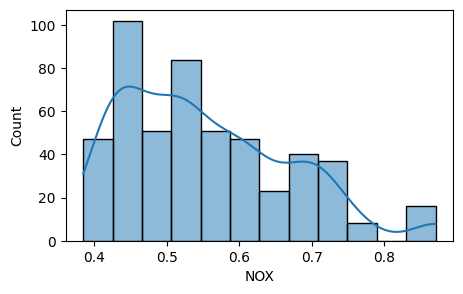

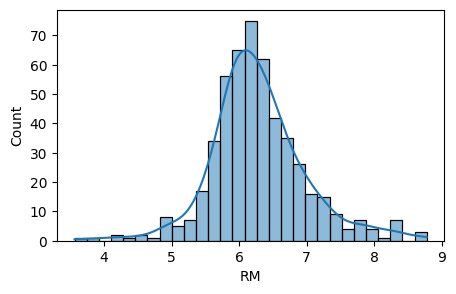

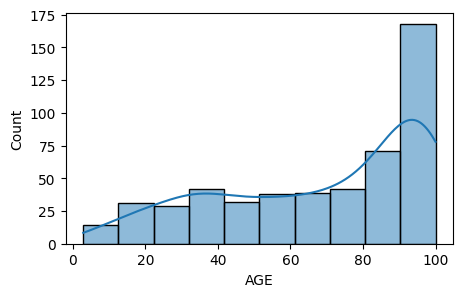

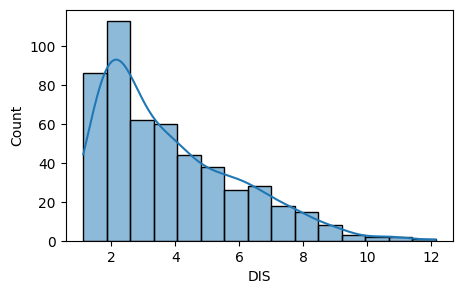

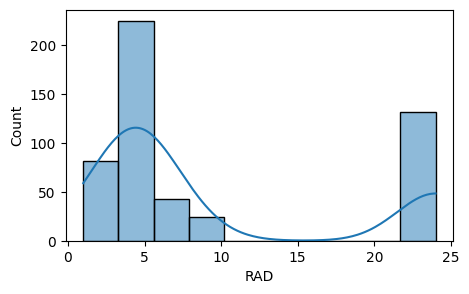

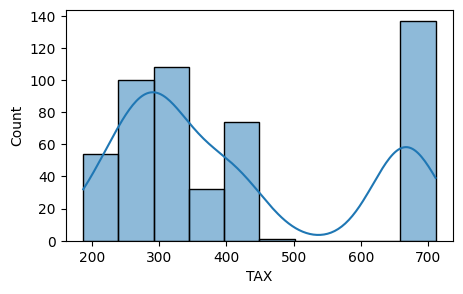

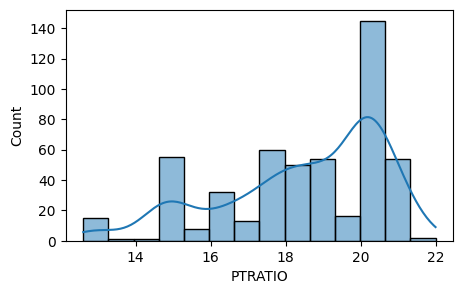

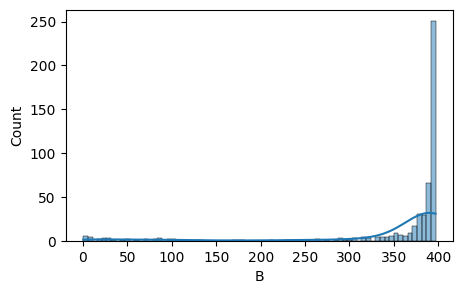

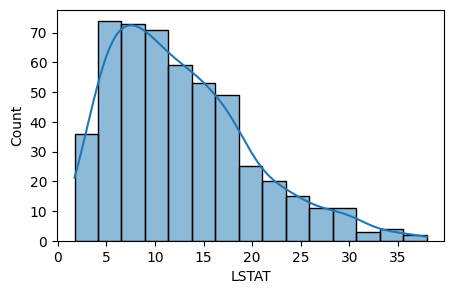

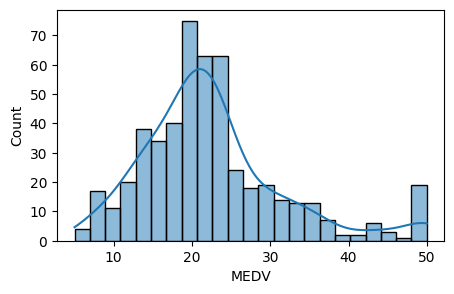

In [223]:
for i in df.columns:
    plt.figure(figsize=(5, 3))
    sns.histplot(data=df, x=i, kde = True)
    plt.show()

#Observations from the univariate analysis
The variables CRIM and ZN are positively skewed. This suggests that most of the areas have lower crime rates and most residential plots are under the area of 25,000 sq. ft.


The variable CHAS, with only 2 possible values 0 and 1, follows a binomial distribution, and the majority of the houses are away from Charles river (CHAS = 0).


The distribution of the variable AGE suggests that many of the owner-occupied houses were built before 1940.


The variable DIS (average distances to five Boston employment centers) has a nearly exponential distribution, which indicates that most of the houses are closer to these employment centers.


The variables TAX and RAD have a bimodal distribution., indicating that the tax rate is possibly higher for some properties which have a high index of accessibility to radial highways.


In [224]:
#let us check the outliers in the target variable which can lead to skewness
def drop_outliers_iqr(df, threshold=1.5):
    """
    Remove rows from DataFrame that contain outliers in any column.
    """
    df_clean = df.copy()
    Q1 = df_clean.quantile(0.25)
    Q3 = df_clean.quantile(0.75)
    IQR = Q3 - Q1

    # Boolean mask where True means the value is **not** an outlier
    mask = ~((df_clean < (Q1 - threshold * IQR)) | (df_clean > (Q3 + threshold * IQR))).any(axis=1)

    return df_clean[mask]
df1 = drop_outliers_iqr(df)

<Axes: ylabel='MEDV'>

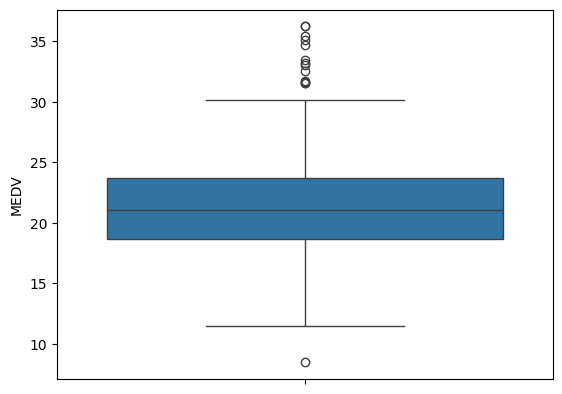

In [225]:
sns.boxplot(data=df1,y='MEDV')

Here by detecting the outliers we reduced the skewness of the target variable without that we have to change the skewness and transform it to the normal distribution.

In [226]:
#check for the skewness of the target variable
df1['MEDV'].skew()
#skewness >0 means right skewed
#skewness <0 means left skewed

np.float64(0.5613832666289479)

Here the medv is slightly right skewed So we wil apply the log normal distibution of numpy to the target variable.

np.float64(-0.33032129530987864)

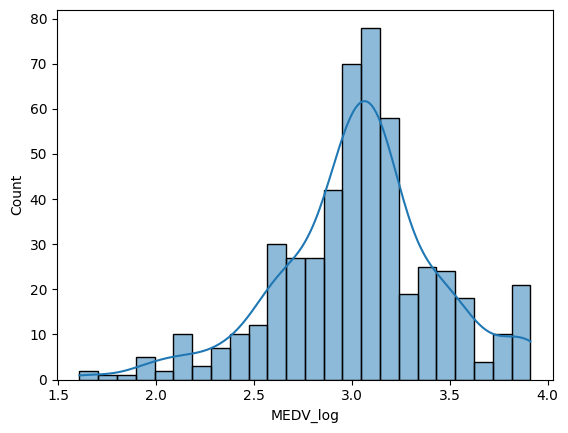

In [227]:
#if there is significant skewness despite of removing outliers then we have to do.
df['MEDV_log'] = np.log(df['MEDV'])
sns.histplot(data=df, x='MEDV_log', kde = True)
df['MEDV_log'].skew()

#Bivariate analysis

<Axes: >

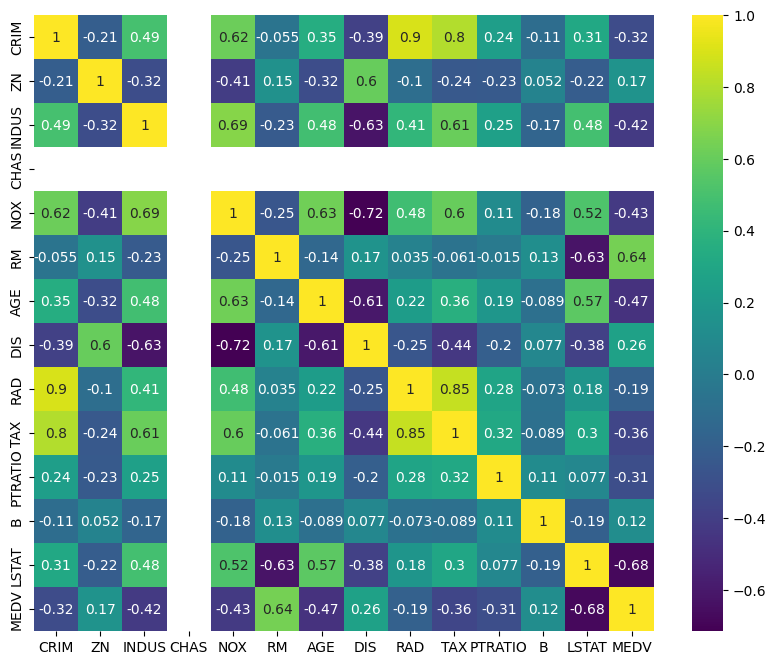

In [213]:
plt.figure(figsize=(10,8))
sns.heatmap(df1.corr(),cmap='viridis',annot=True)

Observations

1. indus is positively related with nox and taxes
2. Distance from employeement centers is negatively correlated with propotion of non-retail business acres, oxide concentration, and proportion of owner-occupied buildings.
3. Oxide concentration is positively correlated with old owner-occupied building
4. Prices of houses is negatively correlated with low status of population which makes much sense.

Now Let us visualize the bigger correlatioship by scatterplot >0.7


"\nplt.figure(figsize=(15, 10))\nfor i, column in enumerate(df_clean.columns[:-2], 1):  # Exclude 'MEDV' and 'MEDV_log'\n    plt.subplot(4, 4, i)\n    sns.scatterplot(data=df_clean, x=column, y='MEDV', alpha=0.5)\n    plt.title(f'{column} vs MEDV')\nplt.tight_layout()\nplt.show()\n"

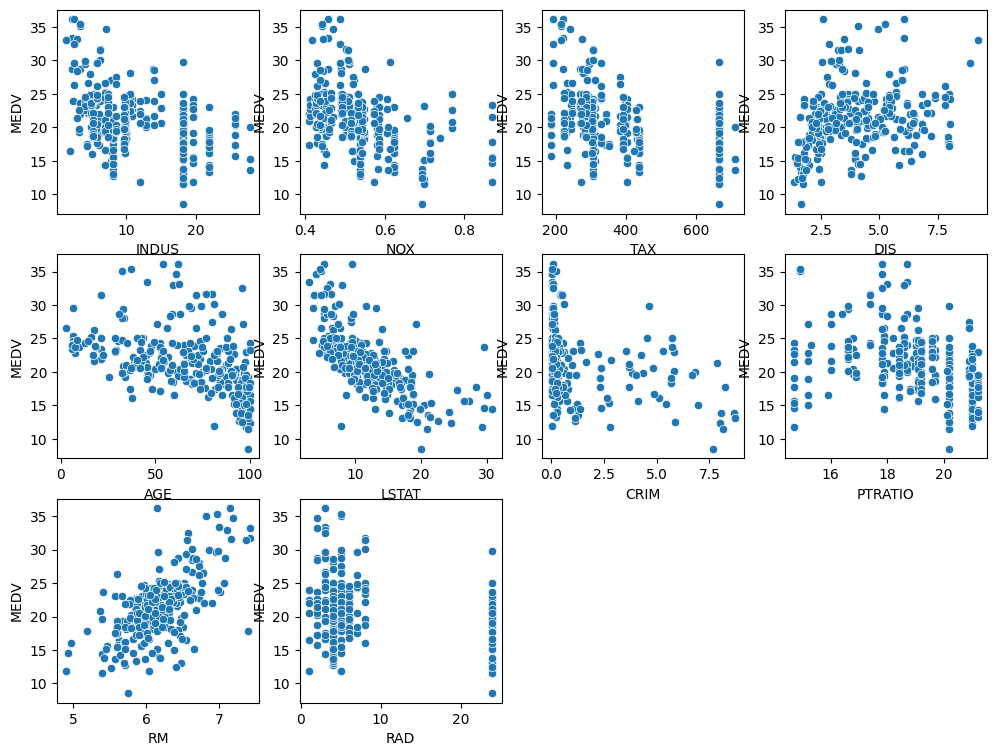

In [214]:
plt.figure(figsize=(12,9))
plt.subplot(3,4,1)
sns.scatterplot(data=df1,y='MEDV',x='INDUS')
plt.subplot(3,4,2)
sns.scatterplot(data=df1,y='MEDV',x='NOX')
plt.subplot(3,4,3)
sns.scatterplot(data=df1,y='MEDV',x='TAX')
plt.subplot(3,4,4)
sns.scatterplot(data=df1,y='MEDV',x='DIS')
plt.subplot(3,4,5)
sns.scatterplot(data=df1,y='MEDV',x='AGE')
plt.subplot(3,4,6)
sns.scatterplot(data=df1,y='MEDV',x='LSTAT')
plt.subplot(3,4,7)
sns.scatterplot(data=df1,y='MEDV',x='CRIM')
plt.subplot(3,4,8)
sns.scatterplot(data=df1,y='MEDV',x='PTRATIO')
plt.subplot(3,4,9)
sns.scatterplot(data=df1,y='MEDV',x='RM')
plt.subplot(3,4,10)
sns.scatterplot(data=df1,y='MEDV',x='RAD')

#or
"""
plt.figure(figsize=(15, 10))
for i, column in enumerate(df_clean.columns[:-2], 1):  # Exclude 'MEDV' and 'MEDV_log'
    plt.subplot(4, 4, i)
    sns.scatterplot(data=df_clean, x=column, y='MEDV', alpha=0.5)
    plt.title(f'{column} vs MEDV')
plt.tight_layout()
plt.show()
"""


Observation:

1. "RM" shows a positive linear trend with "MEDV".
2. "LSTAT" shows a negative trend.
3. "TAX" and "RAD" show some spread with outliers (e.g., high "TAX" values with lower "MEDV").
4. RAD and RN shows discretnes and not continuous which is not good for linear regression model.

How These Conclusions Guide the Next Steps
Feature Selection:

Strong Predictors: "RM" and "LSTAT" show strong linear relationships with "MEDV" and should be included in the linear regression model.

Moderate Predictors: "NOX", "PTRATIO", and "TAX" show some linear trends but may need further preprocessing.

Weak Predictors: "RAD", "ZN", "INDUS", and "B" show weak or non-linear relationships and may be excluded or transformed.

<Axes: xlabel='DIS', ylabel='NOX'>

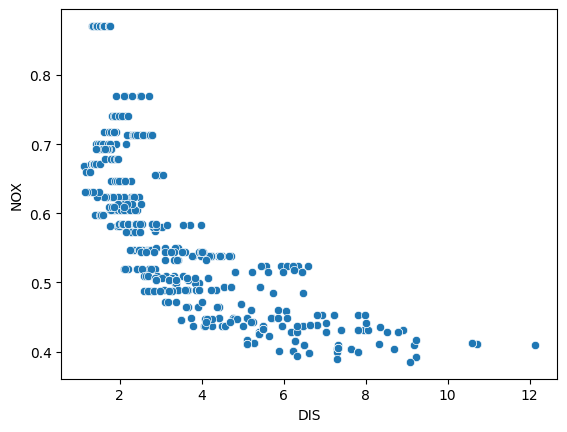

In [215]:
sns.scatterplot(data=df,y='NOX',x='DIS')

As the distance from employee centres is increasing less oxide is there.

<Axes: xlabel='AGE', ylabel='DIS'>

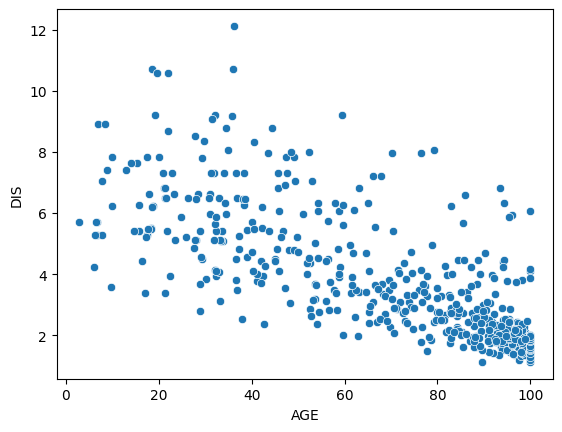

In [216]:
sns.scatterplot(data=df,x='AGE',y='DIS')

The distance from the employee centres seems to be decreasing with the increasing in the age of the house.

<Axes: xlabel='TAX', ylabel='RAD'>

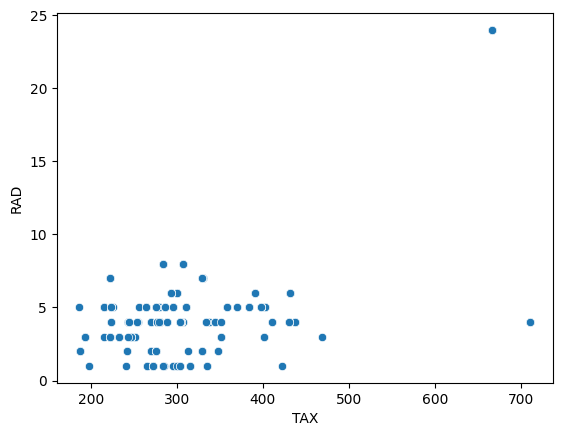

In [217]:
#from the heatmap it shows very significant correlation between independent which is not good.
sns.scatterplot(data=df,x='TAX',y='RAD')

Here the correaltion between RAD and Tax is very high this can be due to outliers. Let us plot after removing outliers.

In [218]:
# remove the data corresponding to high tax rate
df1 = df[df['TAX'] < 600]
# import the required function
from scipy.stats import pearsonr
# calculate the correlation
print('The correlation between TAX and RAD is', pearsonr(df1['TAX'], df1['RAD'])[0])

The correlation between TAX and RAD is 0.24975731331429196


#Check for multicolinearity
Here we will use VIF method for solving multicolinearity problem value>10 will be depicting high correlation which is not good for our model.

We will drop the column having very significant high VIF Value.

Drop the columns having very high colinearity.

In [228]:
import statsmodels.api as sm
a=sm.add_constant(df)
b = df['MEDV']
modelz=sm.OLS(b,a).fit()
modelz.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   MEDV   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 5.729e+30
Date:                Wed, 14 May 2025   Prob (F-statistic):               0.00
Time:                        18:03:13   Log-Likelihood:                 15196.
No. Observations:                 506   AIC:                        -3.036e+04
Df Residuals:                     490   BIC:                        -3.029e+04
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       2.842e-14   4.08e-14      0.696      0.487   -5.18e-14    1.09e-13
CRIM       -4.185e-16   1.73e-16     -2.424      0.016   -7.58e-16   -7.93e-17
ZN         -4.727e-17   6.55e-17     -0.722      0.471   -1.76e-16    8.14e-17
INDUS       7.295e-16    2.9e-16      2.519      0.012     1.6e-16     1.3e-15
CHAS        6.516e-15   4.09e-15      1.594      0.112   -1.52e-15    1.45e-14
NOX        -2.187e-14   1.84e-14     -1.188      0.236   -5.81e-14    1.43e-14
RM          1.575e-15   2.18e-15      0.722      0.471   -2.71e-15    5.86e-15
AGE        -1.388e-17   6.21e-17     -0.223      0.823   -1.36e-16    1.08e-16
DIS        -5.551e-16   9.89e-16     -0.562      0.575    -2.5e-15    1.39e-15
RAD         5.378e-16   3.21e-16      1.677      0.094   -9.25e-17    1.17e-15
TAX        -9.031e-17    1.8e-17     -5.021      0.000   -1.26e-16    -5.5e-17
PTRATIO      -6.8e-16   6.49e-16     -1.048      0.295   -1.96e-15    5.95e-16
B          -2.973e-17   1.28e-17     -2.322      0.021   -5.49e-17   -4.57e-18
LSTAT       7.147e-16   2.89e-16      2.476      0.014    1.48e-16    1.28e-15
MEDV           1.0000   4.58e-16   2.18e+15      0.000       1.000       1.000
MEDV_log    7.661e-15   1.14e-14      0.669      0.504   -1.48e-14    3.02e-14
==============================================================================
Omnibus:                       13.315   Durbin-Watson:                   0.155
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               14.362
Skew:                           0.338   Prob(JB):                     0.000761
Kurtosis:                       3.474   Cond. No.                     2.41e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.41e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [229]:
df1.drop('NOX',axis=1,inplace=True)

In [230]:
df1.corr()

,CRIM,ZN,INDUS,CHAS,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
CRIM,1.000000,-0.210341,0.494892,NaN,-0.055495,0.349502,-0.386631,0.896524,0.799501,0.236846,-0.112067,0.313103,-0.324550
ZN,-0.210341,1.000000,-0.318908,NaN,0.145068,-0.317293,0.602665,-0.104204,-0.240486,-0.233578,0.051526,-0.216148,0.165544
INDUS,0.494892,-0.318908,1.000000,NaN,-0.227952,0.479729,-0.627017,0.413444,0.605088,0.251323,-0.165349,0.484326,-0.421494
CHAS,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
RM,-0.055495,0.145068,-0.227952,NaN,1.000000,-0.142963,0.165074,0.035247,-0.061476,-0.015428,0.126908,-0.625223,0.644819
AGE,0.349502,-0.317293,0.479729,NaN,-0.142963,1.000000,-0.607353,0.224189,0.363663,0.185346,-0.088601,0.567426,-0.467925
DIS,-0.386631,0.602665,-0.627017,NaN,0.165074,-0.607353,1.000000,-0.254432,-0.440637,-0.200926,0.077007,-0.384235,0.263073
RAD,0.896524,-0.104204,0.413444,NaN,0.035247,0.224189,-0.254432,1.000000,0.852483,0.283171,-0.073357,0.178373,-0.188320
TAX,0.799501,-0.240486,0.605088,NaN,-0.061476,0.363663,-0.440637,0.852483,1.000000,0.315250,-0.089440,0.298730,-0.357251
PTRATIO,0.236846,-0.233578,0.251323,NaN,-0.015428,0.185346,-0.200926,0.283171,0.315250,1.000000,0.105081,0.076950,-0.309855


#Divide the dataset into Training and Test data.

In [231]:
from sklearn.model_selection import train_test_split
x=df1.drop('MEDV',axis=1)
y=df1['MEDV']
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [232]:
x.head()

,CRIM,ZN,INDUS,CHAS,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0,6.575,65.2,4.0900,1,296,15.3,396.90,4.98
1,0.02731,0.0,7.07,0,6.421,78.9,4.9671,2,242,17.8,396.90,9.14
2,0.02729,0.0,7.07,0,7.185,61.1,4.9671,2,242,17.8,392.83,4.03
3,0.03237,0.0,2.18,0,6.998,45.8,6.0622,3,222,18.7,394.63,2.94
4,0.06905,0.0,2.18,0,7.147,54.2,6.0622,3,222,18.7,396.90,5.33


# Standardizing the data from standard scaler

In [233]:
#from sklearn.preprocessing import StandardScaler
#sc=StandardScaler()
#x_train=sc.fit_transform(x_train)
#x_test=sc.transform(x_test)

# Applying the Linear Regression model.

In [234]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
lr=LinearRegression()
lr.fit(x_train,y_train)
y_test_pred=lr.predict(x_test)
y_train_pred=lr.predict(x_train)

# Evaluation of Model

In [235]:
from sklearn.metrics import mean_squared_error, r2_score
r2_train=r2_score(y_train,y_train_pred)
print("Train r2",r2_train)
r2_test=r2_score(y_test,y_test_pred)
print("Test r2",r2_test)
mse=mean_squared_error(y_test,y_test_pred)
print("Test mse",mse)

Train r2 0.7049483175408717
Test r2 0.7827809023751567
Test mse 3.733045768388582


# Predicting using Cross Validation

In [236]:
r2= cross_val_score(lr,x,y,cv=5,scoring='r2')
print(r2)
print(r2.mean())

[ 0.68968394  0.68794399  0.58537553  0.58046404 -0.20907758]
0.46687798389319346


# Visualization of result

Text(0.5, 1.0, 'Actual vs Predicted Values')

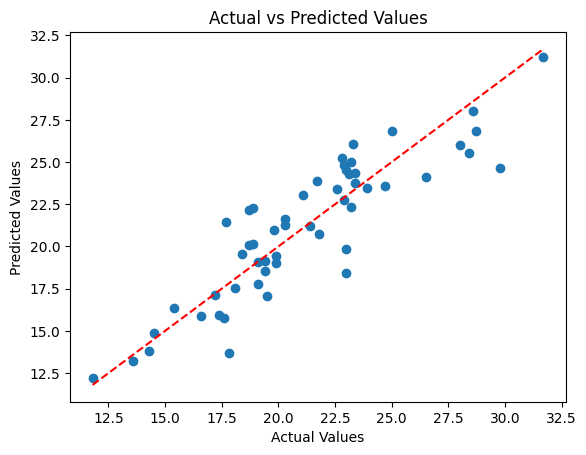

In [237]:
plt.scatter(y_test,y_test_pred)
intercept=lr.intercept_
coeff=lr.coef_
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], '--r')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs Predicted Values')
# here added the line for differenciating actual vs predicted values.

<Axes: xlabel='MEDV', ylabel='Count'>

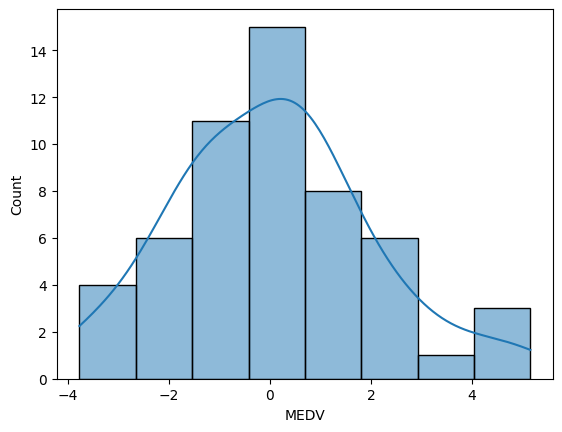

In [238]:
residuals=y_test-y_test_pred
sns.histplot(data=residuals,kde=True)

In [239]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(x_train, y_train)
joblib.dump(model, 'model.pkl')



['model.pkl']